Firt predictive model and visualize it

In [27]:
import pandas as pd
df = pd.read_csv('Transformed_Housing_Data2.csv')
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [2]:
df['mean_sales'] = df['Sale_Price'].mean()

In [3]:
import matplotlib.pyplot as plt

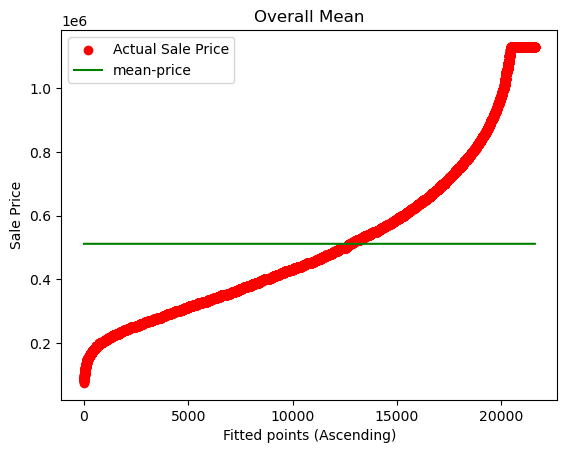

In [4]:

plt. figure(dpi = 100)
k = range(0, len(df))
plt.scatter(k, df['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot( k, df['mean_sales'].sort_values(), color = 'green', label = 'mean-price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt. title('Overall Mean')
plt. legend ()

2nd Model improving upon mean reg model

In [6]:
import numpy as np
grades_mean = df.pivot_table(values='Sale_Price', columns= 'Overall Grade', aggfunc= np.mean)

In [7]:
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [23]:
# making new column
df['grade_mean'] = 0
# for every grade fill its mean price in new column
for i in grades_mean.columns:
  df.loc[df['Overall Grade'] == i, 'grade_mean'] = grades_mean[i][0]


df['grade_mean'].head ()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [24]:
classwise_list = []
for i in range(1, 11):
    k = df["Sale_Price"][df["Overall Grade"] == i]
    classwise_list.append(k)


In [25]:
print(len(classwise_list))


10


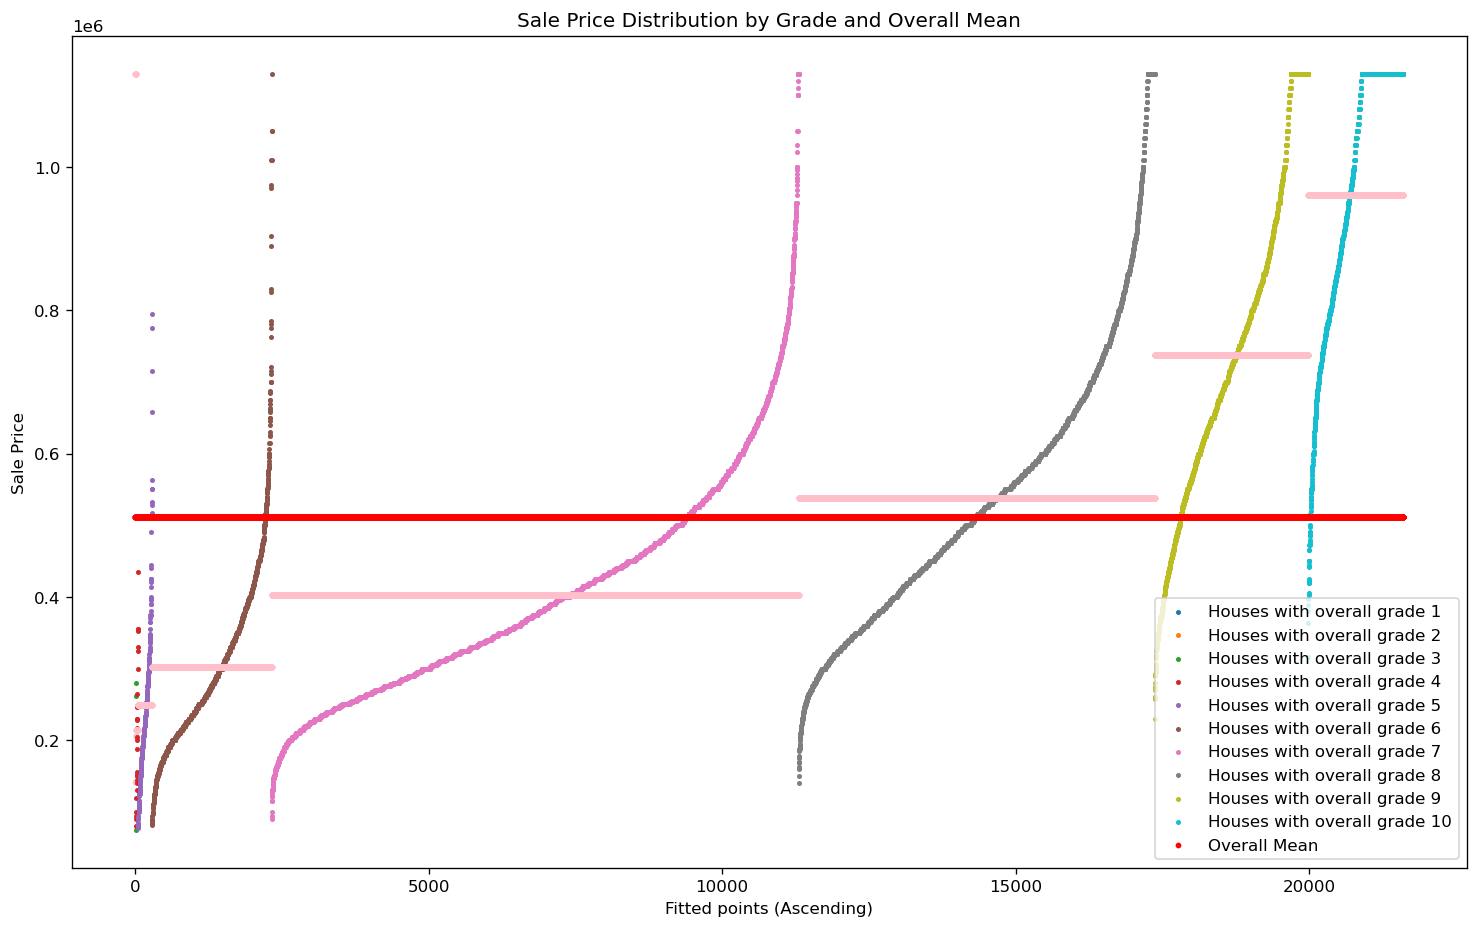

In [26]:
import matplotlib.pyplot as plt

plt.figure(dpi=120, figsize=(15, 9))

# z is for x-axis positioning
z = 0
for i in range(1, 11):
    # x-axis points
    points = [k for k in range(z, z + len(classwise_list[i - 1]))]
    
    # Scatter plot of actual sale prices
    plt.scatter(points,
                classwise_list[i - 1].sort_values(),
                label=f'Houses with overall grade {i}',
                s=4)

    # Plot gradewise mean as pink dots
    plt.scatter(points,
                [classwise_list[i - 1].mean()] * len(classwise_list[i - 1]),
                s=6,
                color='pink')

    z = max(points) + 1  # Update x-axis for next grade group

# Plotting overall mean (red line)
plt.scatter([q for q in range(0, z)],
            df['mean_sales'],
            color='red',
            label='Overall Mean',
            s=6)

# Labels and title
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Sale Price Distribution by Grade and Overall Mean')
plt.legend(loc=4)
plt.show()
